In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame

#For plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import norm
sns.set()

In [97]:
from datetime import datetime,timedelta


In [157]:
bookings = pd.read_csv('Data\SIS_bookings_1102.csv')

In [158]:
bookings

,Unnamed: 0,Day,Facility,Booking Time,Booking Status,Booking Reference Number,Booked for User Name,Booked for User Org Unit,Booked for User Email Address,Use Type,Purpose of Booking
0,0,"11 February 2020, Tuesday",SIS GSR 2-1,19:00-21:00,Confirmed,BK-20200210-000645,WEE XI HWEE,Student,xihwee.wee.2019@sis.smu.edu.sg,Academic,Study for programming
1,1,"11 February 2020, Tuesday",SIS GSR 2-2,11:30-15:30,Confirmed,BK-20200131-000995,"LOW HUI FONG, IRIS",Student,iris.low.2018@sis.smu.edu.sg,Academic,meeting
2,2,"11 February 2020, Tuesday",SIS GSR 2-2,15:30-19:30,Confirmed,BK-20200203-001315,"CHUA ZHI NING, CHARLOTTE",Student,znchua.2019@sis.smu.edu.sg,AdHoc,study
3,3,"11 February 2020, Tuesday",SIS GSR 2-3,12:00-15:00,Confirmed,BK-20200129-001198,LIM JIA WEN,Student,jiawen.lim.2018@business.smu.edu.sg,AdHoc,study
4,4,"11 February 2020, Tuesday",SIS GSR 2-3,15:00-17:00,Confirmed,BK-20200210-001217,"LEK JAN YEE, LOIS",Student,lois.lek.2018@sis.smu.edu.sg,AdHoc,Meeting
...,...,...,...,...,...,...,...,...,...,...,...
444,444,"29 January 2020, Wednesday",SIS GSR 3-5,16:00-20:00,Confirmed,BK-20200116-000861,WONG KA WING,Student,kawing.wong.2018@business.smu.edu.sg,AdHoc,study
445,445,"29 January 2020, Wednesday",SIS GSR 3-5,20:00-22:00,Confirmed,BK-20200129-001128,JOSIAH TAN XIN YI,Student,josiahtan.2019@law.smu.edu.sg,AdHoc,meeting
446,446,"29 January 2020, Wednesday",SIS GSR 3-6,12:00-16:00,Confirmed,BK-20200117-000826,LIN PO CHIEN,Student,pochien.lin.2019@socsc.smu.edu.sg,AdHoc,meeting
447,447,"29 January 2020, Wednesday",SIS GSR 3-6,16:00-18:00,Confirmed,BK-20200127-000439,LIM YIN SHAN,Student,yinshan.lim.2019@sis.smu.edu.sg,Academic,project meeting


In [7]:
bookings['2']

0      Booking Time
1       08:30-12:30
2       13:00-17:00
3       10:00-14:00
4       13:00-17:00
           ...     
801     12:00-15:30
802     19:00-22:30
803     14:30-17:00
804     13:30-17:00
805     13:30-17:00
Name: 2, Length: 806, dtype: object

In [9]:
bookings.count()

Unnamed: 0    806
0             806
1             806
2             806
3             806
dtype: int64

In [10]:
bookings = bookings.rename(columns={'0' : 'Day', '1': 'Facility', '2':'Booking Time', '3': 'Purpose'})

In [11]:
bookings = bookings.drop(columns='Unnamed: 0')

In [12]:
bookings = bookings.drop(bookings.index[0])

In [13]:
bookings

,Day,Facility,Booking Time,Purpose
1,"8 February 2020, Saturday",SIS Class Rm B1-1,08:30-12:30,Student
2,"8 February 2020, Saturday",SIS GSR 2-1,13:00-17:00,Student
3,"8 February 2020, Saturday",SIS GSR 2-5,10:00-14:00,Student
4,"8 February 2020, Saturday",SIS GSR 2-6,13:00-17:00,Student
5,"8 February 2020, Saturday",SIS GSR 3-1,10:30-14:30,Student
...,...,...,...,...
801,"27 January 2020, Monday",SIS GSR 3-6,12:00-15:30,Timetabling & Course Enrolment
802,"27 January 2020, Monday",SIS GSR 3-6,19:00-22:30,Student
803,"26 January 2020, Sunday",SIS GSR 3-5,14:30-17:00,Student
804,"25 January 2020, Saturday",SIS GSR 3-6,13:30-17:00,Faculty


In [14]:
bookings[bookings['Purpose'] =='Student'].count()

Day             487
Facility        487
Booking Time    487
Purpose         487
dtype: int64

In [15]:
bookings['Facility'].unique()

array(['SIS Class Rm B1-1', 'SIS GSR 2-1', 'SIS GSR 2-5', 'SIS GSR 2-6',
       'SIS GSR 3-1', 'SIS GSR 3-2', 'SIS GSR 3-3', 'SIS GSR 3-5',
       'SIS GSR 3-6', 'SIS Seminar Rm B1-1', 'SIS Seminar Room 2-1',
       'SIS Seminar Room 2-2', 'SIS Seminar Room 2-3',
       'SIS Seminar Room 2-4', 'SIS Seminar Room 3-3', 'SIS GSR 2-2',
       'SIS GSR 2-3', 'SIS GSR 2-4', 'SIS GSR 2-7', 'SIS GSR 3-4',
       'SIS Seminar Room 3-1', 'SIS Seminar Room 3-2',
       'SIS Seminar Room 3-4'], dtype=object)

In [16]:
bookings['Purpose'].unique()

array(['Student', 'Faculty', 'SIS PG by Course Work',
       'Institute of Innovation and Entrepreneurship',
       'Office of the Dean', 'Learning Space Technology Services',
       'Creative Experience and Partnerships Team', 'SIS Instructors',
       'Timetabling & Course Enrolment', 'Conference',
       'Living Analytics Research Centre',
       'School of Information Systems',
       'SIS Research Centre (Extenal Funded)', 'SMU Academy',
       'Office of Safety & Security', 'Student Leadership',
       'International Student Exchange Programme (Inbound/Outbound) and Short term Study Programme'],
      dtype=object)

In [17]:
bookings['Booking Time'].unique()

array(['08:30-12:30', '13:00-17:00', '10:00-14:00', '10:30-14:30',
       '09:00-13:00', '15:30-17:00', '08:00-09:00', '09:00-09:30',
       '09:30-10:00', '10:00-10:30', '10:30-11:00', '11:00-11:30',
       '11:30-12:00', '13:30-17:00', '09:00-12:30', '08:30-14:00',
       '08:00-17:00', '08:00-13:45', '14:00-19:30', '19:30-22:30',
       '14:00-17:00', '17:00-20:00', '09:00-12:00', '12:00-13:00',
       '18:00-21:30', '10:30-11:30', '12:30-13:30', '14:00-15:00',
       '15:30-16:30', '16:30-18:00', '11:30-15:30', '15:30-19:30',
       '11:00-14:00', '12:30-16:30', '16:30-18:30', '12:00-16:00',
       '16:00-20:00', '09:30-12:00', '12:00-15:30', '19:30-22:00',
       '10:00-12:00', '16:00-19:00', '13:00-16:00', '08:00-11:30',
       '15:30-18:45', '19:00-22:30', '15:30-18:30', '12:00-15:15',
       '12:00-15:45', '16:00-18:45', '15:30-22:30', '11:30-13:45',
       '14:00-19:00', '09:30-18:30', '19:00-22:00', '08:30-12:00',
       '08:30-11:30', '15:30-19:00', '11:00-12:00', '11:30-14:

In [159]:
def get_half_hr_iterations(time_range):
    """
    Given string of booking time-range eg '1030-1200', return the number of 30minutes interval 
    between them eg ['0800-1030', '1200-1400','1630-2230']
    
    hold_start_and_end_timings -> list of start and end timings
    
    time_object_1 & time_object_2 -> converts the start and end timings to datetime.time objects
    whether the day is a weekday or not. 8am to 1030pm
    
    start_booking_time_mins & end_booking_time_mins -> Convert the booking timings into minutes for calculation
    of the number of 30 minutes interval. e.g. 240 minutes -> 4 hours -> 8 thirty minute intervals

    """
    hold_start_and_end_timings = time_range.split('-')
    time_object_1 = datetime.strptime(hold_start_and_end_timings[0],'%H:%M').time()
    time_object_2 = datetime.strptime(hold_start_and_end_timings[1],'%H:%M').time()
    h1, m1, s1 = time_object_1.hour, time_object_1.minute, time_object_1.second
    h2, m2, s2 = time_object_2.hour, time_object_2.minute, time_object_2.second
    
    start_booking_time_mins = (m1 + 60*h1) 
    end_booking_time_mins = (m2 + 60*h2)
    
    return int((end_booking_time_mins - start_booking_time_mins)/60/0.5)


print(get_half_hr_iterations('08:30-12:30'))

# bookings['Booking Time'].apply(get_half_hr_iterations())

8


In [160]:
def expand_df_based_on_intervals(bookings):
    """
    Given a dataframe containing bookings in time-ranges e.g. 08:30-09:30, 
    returns a new dataframe after expanding the timing into 
    30 minutes interval -> 08:30, 09:00, 09:30. 
    This is done for every row of facility booking.
    
    new_bookings -> new pandas DataFrame to hold the expanded time-ranges based on 30 minutes interval. 
    To be returned at the end.
    
    num_iter -> Given string of booking time-range eg '1030-1200', return the number of 30 minutes interval 
    between them eg ['0800-1030', '1200-1400','1630-2230']
    
    hold_time -> String which holds the starttime after splitting the time-range by '-'. e.g. '08:30-10:30 -> 08:30'
    """

    new_bookings = pd.DataFrame(columns=['Day','Facility','Booking Time','Booking Status', 'Booking Reference Number', 
                                         'Booked for User Name', 'Booked for User Org Unit', 'Booked for User Email Address',
                                        'Use Type', 'Purpose of Booking']) #new df to hold the intervals

    for index,columns in bookings.iterrows():
        num_iter = get_half_hr_iterations(columns['Booking Time']) #generates 30 minutes interval
        hold_time = columns['Booking Time'].split('-')
        hold_time = hold_time[0]

        for i in range(num_iter):
            #add a new row of record into the new df
            new_bookings.loc[len(new_bookings)] = [columns['Day'], columns['Facility'], hold_time, columns['Booking Status'],
                                                  columns['Booking Reference Number'],columns['Booked for User Name'],
                                                   columns['Booked for User Org Unit'],columns['Booked for User Email Address'],
                                                  columns['Use Type'],columns['Purpose of Booking']] 
            
            #add 30 minutes to the previous timing added into the new df
            hold_time = datetime.strptime(hold_time,'%H:%M')+ timedelta(minutes=30) 
            
            #the hold_time variable is now a datetime object because timedelta cannot be used on datetime.time() objects
            #so, we convert it back to timings as we do not need the date
            hold_time = hold_time.strftime("%H:%M")
            
    return new_bookings

test = expand_df_based_on_intervals(bookings)
#plot timings based on how many rows for each timing
#popular facilities/GSR from the schools
#relationship between the school booker is from vs the school which booker booked in
#forecasting(?????)
#do analysis with SR vs without SR to see differences/trends
#pd.grouper() to groupby weeks, frequency = w




In [161]:
test.head()

,Day,Facility,Booking Time,Booking Status,Booking Reference Number,Booked for User Name,Booked for User Org Unit,Booked for User Email Address,Use Type,Purpose of Booking
0,"11 February 2020, Tuesday",SIS GSR 2-1,19:00,Confirmed,BK-20200210-000645,WEE XI HWEE,Student,xihwee.wee.2019@sis.smu.edu.sg,Academic,Study for programming
1,"11 February 2020, Tuesday",SIS GSR 2-1,19:30,Confirmed,BK-20200210-000645,WEE XI HWEE,Student,xihwee.wee.2019@sis.smu.edu.sg,Academic,Study for programming
2,"11 February 2020, Tuesday",SIS GSR 2-1,20:00,Confirmed,BK-20200210-000645,WEE XI HWEE,Student,xihwee.wee.2019@sis.smu.edu.sg,Academic,Study for programming
3,"11 February 2020, Tuesday",SIS GSR 2-1,20:30,Confirmed,BK-20200210-000645,WEE XI HWEE,Student,xihwee.wee.2019@sis.smu.edu.sg,Academic,Study for programming
4,"11 February 2020, Tuesday",SIS GSR 2-2,11:30,Confirmed,BK-20200131-000995,"LOW HUI FONG, IRIS",Student,iris.low.2018@sis.smu.edu.sg,Academic,meeting


In [156]:
# new_bookings.describe()
# new_bookings.info()

In [18]:
bookings_time = bookings.groupby('Booking Time').size()
bookings_time

Booking Time
00:00-10:30     1
08:00-09:00     1
08:00-11:30    81
08:00-11:45     2
08:00-13:45     2
               ..
20:00-22:00     1
20:00-22:30     3
20:30-22:30     2
21:30-00:00     1
22:00-22:30     1
Length: 127, dtype: int64

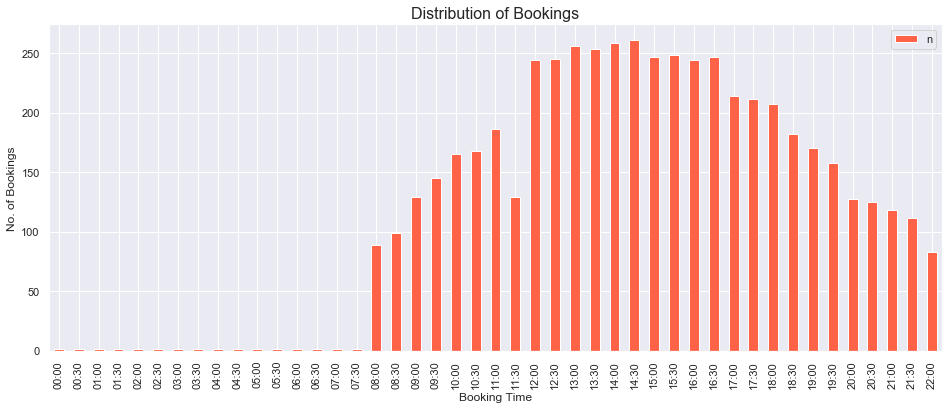

In [155]:
bookings_time = test.groupby('Booking Time').size().reset_index(name='n')

fig, ax = plt.subplots()
bookings_time.plot(kind='bar', x='Booking Time', y='n', ax=ax, figsize=(16, 6), color='tomato',)
ax.set_ylabel("No. of Bookings")
ax.set_xlabel("Booking Time")
plt.title("Distribution of Bookings", fontsize=16)
plt.show()

In [ ]:
def filter_(x):
    if '15:30' in x:
        r = 1
    else:
        r = 0
    return r

In [ ]:
bookings['15:30'] = bookings['Booking Time'].apply(filter_)

In [ ]:
bookings['15:30'].value_counts()

In [ ]:
bookings

In [ ]:
bookings['Purpose'].value_counts()